### 선형 회귀분석과 Elastic Net 실습

In [1]:
# 필요한 패키지 설치

import pandas as pd # csv file 
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성 
from sklearn.model_selection import train_test_split # train/test set 생성 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가 
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# 각 컬럼의 통계치 확인
df.describe()

#모든 모델에서 통계치 확인은 필수적이다. 특히, 최소,최댓값을 통해 이상치가 없는지 확인해야한다.
#bedrooms의 최댓값이 33인데, 혹여나 잘못된 값은 아닌지 확인해보는 것이 좋아보인다.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


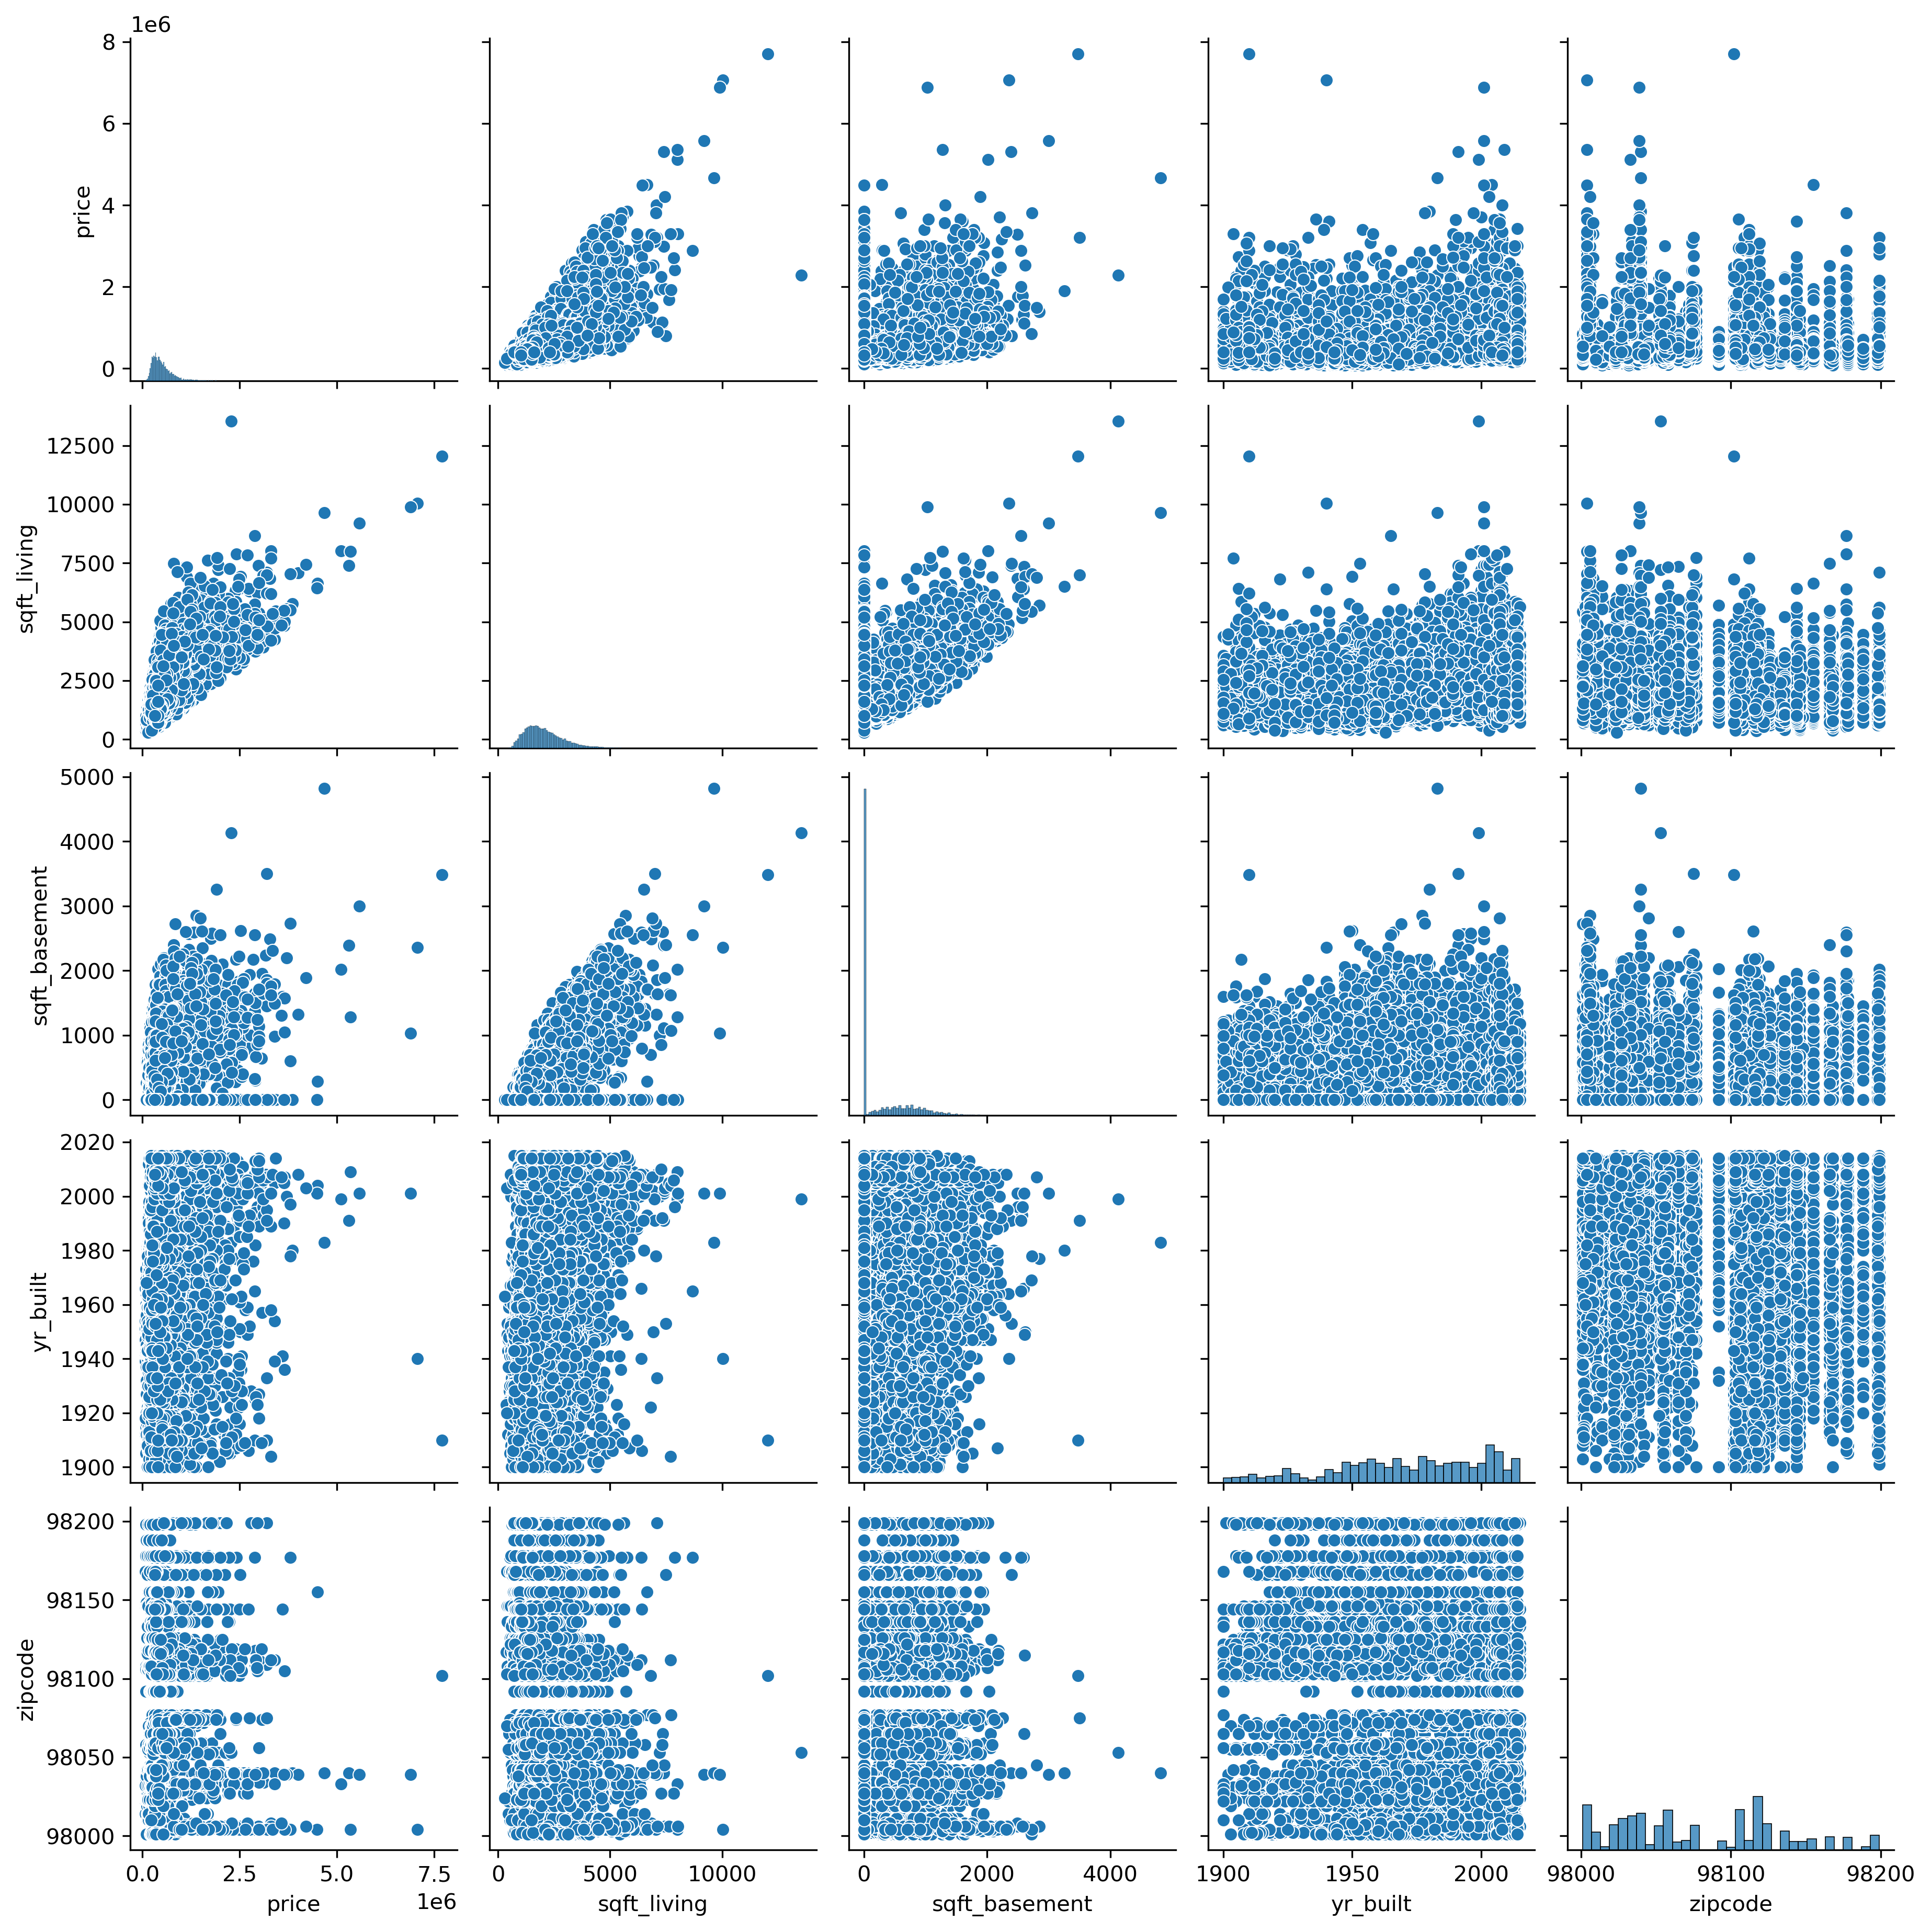

In [5]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

#데이터 시각화를 하여 직관적으로 데이터를 파악한다.
#샘플로 종속변수인 price를 포함한 5개의 변수의 산포도를 확인해 보자.
#price는 sqft_living과 sqft_basement 변수에 강한 영향을 받을 것으로 추측할 수 있다.
#yr_built와도 약간의 상관관계가 있는 것으로 보인다.
#아무래도 지어진 시기가 최근일수록 집 가격이 높은 경향이 있을 것이니 논리적으로 맞아 보인다.
#이처럼 각 변수와의 관계를 상식적,비즈니스적으로 해석해 보는 것이 좋다.
#또한, sqft_living과 sqft_basement 두 변수 간에도 높은 상관관계가 보인다. 이처럼 독립변수 간의 상관성이 높으면 다중공산성을 유발하여
#모델 성능을 저하시킬 수 있으므로 주의해야 한다.

In [6]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# 독립변수와 종속변수 분리하여 생성
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['price']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
# df_train, df_test = train_test_split(df, test_size = 0.3) 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

#독립변수 데이터셋에는 키값인 id와 date 그리고 종속변수인 price를 제외한 모든 변수를 넣어주었다.
#그리고 학습셋과 테스트셋은 train_test_split() 함수로 7:3 비율로 분리해준다.

In [8]:
# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

#대략 7:3으로 잘 나누어진 것을 확인할 수 있다.

train data 개수:  15129
test data 개수:  6484


In [9]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 

#여기서 fit_intercept는 상수항을 넣을지 말지를 성절해주는 옵션이다. 기본값은 true라서 상수항을 빼지 않을거라면 생략해도 된다.

LinearRegression()

In [10]:
# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

#학습셋으로 생성된 모델을 테스트셋에 적용하여 예측값을 생성한다.
#이를 통해 모델 성능을 측정할 수 있다.
#우선 생성된 모델의 상숫값과 회귀게쑤를 확인하라면 다음의 코드로 생성한다.

In [11]:
# 모델의 상수값 확인
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.coef_)

[8039893.89497555]
[[-3.67862952e+04  4.34372938e+04  1.13516461e+02  9.20108209e-02
   1.91697216e+03  6.20167865e+05  5.44765387e+04  2.54257561e+04
   9.27532652e+04  7.52558498e+01  3.82606110e+01 -2.57040744e+03
   2.00641696e+01 -6.21762660e+02  6.12448794e+05 -2.30872236e+05
   1.98345539e+01 -3.95693277e-01]]


In [12]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

#학습셋의 R-square가 0.7이면 준수한 수준이다. 하지만 실무에선 0.7이상인 것을 찾기 힘들다.
#그리고 테스트셋의 결정계수값과 그렇게 큰 차이가 없기 때문에 과적합되지 않았음을 판단할 수 있다.
#이 수치는 모델을 돌릴 때마다 달라질 수 있다. 왜냐하면 학습셋과 테스트셋 분리단계에서 데이터가 무작위로 배정되기 때문이다.
#결과를 고정하려면 RandomState() 함수를 사용하면 된다.

학습셋 R-Square: 0.70
테스트셋 R-Square: 0.71


In [13]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

#p-value를 확인할 떄 LinearRegresision 패키지는 모델 결과치를 확인하기 어렵다. 수식을 입려하면 되지만 여간 번거러운게 아니다
#이에 OLS 패키지를 사용한다.
#마지막 NOTES의 2번을 보면 다중공산성 문제가 있을 가능성이 높다고 알려준다.
#모델 성능을 떨어트리는 변수들을 제거하거나 가공해주는 절차가 필요해보인다.
#이처럼 모델 성능 평가를 통해 데이터와 모델을 수정해 가며 성능을 향상시키는 작업이 필요하다.
#그리고 모델 성능을 측정하는 방법은 이 외에도 다양하다,
#RMSE,MAE,AIC,BIC등 다른 기준은 모델 평가 부분에서 자세히 다루도록 하겠다.
#이어서 비선형 예측 모델인 다항회귀를 실습한다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2031.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:44:52   Log-Likelihood:            -2.0657e+05
No. Observations:               15129   AIC:                         4.132e+05
Df Residuals:                   15111   BIC:                         4.133e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           8.04e+06   3.62e+06      2.223      0.026    9.51e+05    1.51e+07
bedrooms      -3.679e+04   2290.555    -16.060      0.000   -4.13e+04   -3.23e+04
bathrooms      4.344e+04   3996.618     10.869      0.000    3.56e+04    5.13e+04
sqft_living     113.5148      2.752     41.247      0.000     108.120     118.909
sqft_lot          0.0920      0.062      1.495      0.135      -0.029       0.213
floors         1916.9722   4388.611      0.437      0.662   -6685.236    1.05e+04
waterfront     6.202e+05   2.15e+04     28.778      0.000    5.78e+05    6.62e+05
view           5.448e+04   2615.161     20.831      0.000    4.94e+04    5.96e+04
condition      2.543e+04   2883.151      8.819      0.000    1.98e+04    3.11e+04
grade          9.275e+04   2621.868     35.377      0.000    8.76e+04    9.79e+04
sqft_above       75.2575      2.741     27.457      0.000      69.885      80.630
sqft_basement    38.2623      3.224     11.868      0.000      31.943      44.582
yr_built      -2570.4074     89.240    -28.803      0.000   -2745.329   -2395.486
yr_renovated     20.0642      4.441      4.518      0.000      11.360      28.769
zipcode        -621.7627     40.519    -15.345      0.000    -701.185    -542.340
lat            6.124e+05   1.31e+04     46.724      0.000    5.87e+05    6.38e+05
long          -2.309e+05    1.6e+04    -14.405      0.000   -2.62e+05   -1.99e+05
sqft_living15    19.8346      4.191      4.733      0.000      11.620      28.049
sqft_lot15       -0.3957      0.089     -4.452      0.000      -0.570      -0.221
==============================================================================
Omnibus:                    13576.512   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1611293.714
Skew:                           3.846   Prob(JB):                         0.00
Kurtosis:                      52.969   Cond. No.                     6.45e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.68e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_m.fit_transform(x_train)

# 다항 회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train) 

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

#여기서 degree=2는 독립변수를 2차항으로 변환하겠다는 뜻이다. 값을 조정하여 차수를 높일 수 있다,
#incluse_bias는 기본값이 True이다. 이는 편향을 위한 변수(X0)인 1을 추가하는 것인데, 다항식의 모든 거듭제곱이 0일경우에 True로 설정해준다.

In [15]:
# 모델의 상수값 확인
print(mreg_poly.intercept_)

# 모델의 회귀계수 확인
print(mreg_poly.coef_)

[2.27906631e+10]
[[ 1.23222690e+07 -1.03701247e+07 -4.97057290e+03 -4.39116927e+02
  -5.17058824e+07  3.87352643e+07  2.74282547e+06 -7.27695826e+05
  -1.10953725e+07  4.61919915e+04 -2.01382245e+04  1.10216516e+04
   3.26774644e+04 -5.14619636e+05  1.09159273e+08  1.65053415e+06
  -1.60085738e+04  5.63929222e+02  9.62874439e+02  1.17630880e+03
  -6.45269394e+01  1.84353413e-01  2.34019287e+04 -5.65094724e+04
   1.39399027e+03 -5.32547847e+03 -1.04347952e+03  3.85490217e+01
   4.18466637e+01 -3.75135244e+02 -9.16723543e+00 -3.43590591e+01
  -1.93267958e+04  5.96139226e+04  1.01766238e+01 -4.84160251e-02
  -4.11122018e+03  1.96331491e+01 -4.24221280e-01 -4.76643870e+04
   4.53091348e+04  4.93814864e+03 -1.68827948e+04  1.29799252e+04
   3.14041109e+01 -1.18508836e+01  3.45081660e+02 -2.82184519e+01
  -7.42766843e+01  3.16309424e+04 -1.26508612e+05 -5.25708252e+00
   5.19642956e-02 -1.58268131e+02  2.32559198e+02 -6.64481524e+00
   1.47694223e+02 -8.20200879e+00  1.97070533e+01  2.655421

In [16]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

#결정계수 값이 일반회귀모델보다 다항회귀 모델이 예측력이 좋은 것을 확인할 수 있다.
#테스트셋의 값도 큰 차이가 없어 과적합도 피한것으로 보인다.
#이를 통해 해당 데이터는 독립변수와 종속변수가 어느 정도 비선형적 관계를 가지고 있다고 판단할 수 있다.

학습셋 R-Square: 0.83
테스트셋 R-Square: 0.81


In [17]:
# Ridge 설치
from sklearn.linear_model import Ridge

# alpha 별 모델 생성
ridge = Ridge().fit(x_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(x_train, y_train)
ridge100 = Ridge(alpha=100).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("ridge_train R2: {:.3f}".format(ridge.score(x_train, y_train)))
print("ridge_test R2: {:.3f}".format(ridge.score(x_test, y_test)))

print("ridge001_train R2: {:.3f}".format(ridge001.score(x_train, y_train)))
print("ridge001_test R2: {:.3f}".format(ridge001.score(x_test, y_test)))

print("ridge100_train R2: {:.3f}".format(ridge100.score(x_train, y_train)))
print("ridge100_test R2: {:.3f}".format(ridge100.score(x_test, y_test)))

#Ridge 회귀 모델의 기본 alpha 값은 1이다. 추가로 알파값을0.01,100으로 조정하여 결정계수를 비교했다.
#기본 모델과 0.01모델은 성능의 차이가 거의 없으며, 100 모델은 과소적합으로 인해 성능이 떨어지는 것을 확인할 수 있다.
#Lasso 또한 동일한 방법으로 실행했고, 주의할 점은 알파값에 따라 사용되는 변수가 달라지기 때문에 총 몇 개의 변수가 채택됐는지 확인할 필요가 있다.

ridge_train R2: 0.696
ridge_test R2: 0.710
ridge001_train R2: 0.696
ridge001_test R2: 0.710
ridge100_train R2: 0.687
ridge100_test R2: 0.706


In [18]:
# Lasso 설치
from sklearn.linear_model import Lasso

# alpha 별 모델 생성
lasso = Lasso().fit(x_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
lasso10000 = Lasso(alpha=10000).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("lasso_train R2: {:.3f}".format(lasso.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

print("lasso001_train R2: {:.3f}".format(lasso001.score(x_train, y_train)))
print("lasso001_test R2: {:.3f}".format(lasso001.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso001.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso10000.score(x_train, y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso10000.coef_ !=0))

#기본값인 첫번째 모델과 알파값을 0.01로 설정한 모델의 결정계수가 동일하게 나왔다.
#사용된 데이터셋의 총 변수 개수와 관측치 수가 많지 않기 때문에 알파값에 민감하게 반응하지 않는다.
#알파값을 10,000으로 설정했을 때는 6개의 변수가 ㅏㄹ락되어 총 12개의 변수가 사용된 모델이 생성됐고 과소적합이 발생해 예측력이 다소 감소했다.

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.933e+14, tolerance: 2.105e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.933e+14, tolerance: 2.105e+11
  model = cd_fast.enet_coordinate_descent(


lasso_train R2: 0.696
lasso_test R2: 0.710
num_of_IV: 18
lasso001_train R2: 0.696
lasso001_test R2: 0.710
num_of_IV: 18
lasso10000_train R2: 0.625
lasso10000_test R2: 0.644
num_of_IV: 13


C:\Users\qorud\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+14, tolerance: 2.105e+11
  model = cd_fast.enet_coordinate_descent(


In [19]:
# ElasticNet 설치
from sklearn.linear_model import ElasticNet

# alpha 별 모델 생성
elast = ElasticNet().fit(x_train, y_train)
elast001 = ElasticNet(alpha=100, l1_ratio = 0.1).fit(x_train, y_train)
elast10000 = ElasticNet(alpha=10000, l1_ratio = 1).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("elast_train R2: {:.3f}".format(elast.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(elast.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast.coef_ !=0))

print("elast001_train R2: {:.3f}".format(elast001.score(x_train, y_train)))
print("elast001_test R2: {:.3f}".format(elast001.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast001.coef_ !=0))

print("elast10000_train R2: {:.3f}".format(elast10000.score(x_train, y_train)))
print("elast10000_test R2: {:.3f}".format(elast10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast10000.coef_ !=0))

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.304e+14, tolerance: 2.105e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.852e+14, tolerance: 2.105e+11
  model = cd_fast.enet_coordinate_descent(


elast_train R2: 0.615
lasso_test R2: 0.633
num_of_IV: 18
elast001_train R2: 0.542
elast001_test R2: 0.553
num_of_IV: 18
elast10000_train R2: 0.625
elast10000_test R2: 0.644
num_of_IV: 13


C:\Users\qorud\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+14, tolerance: 2.105e+11
  model = cd_fast.enet_coordinate_descent(
